In [1]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt 
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import expected_returns, risk_models

plt.style.use('bmh')

In [2]:
tickers = ['^GSPC', '^N225', '^FTSE', '^GDAXI', '^SET.BK']
data = yf.download(tickers=tickers, period='5y', interval='1d', auto_adjust=True)
data.Close

[*********************100%***********************]  5 of 5 completed


,^FTSE,^GDAXI,^GSPC,^N225,^SET.BK
Date,,,,,
2017-04-27,7237.200195,12443.790039,2388.770020,19251.869141,1566.770020
2017-04-28,7203.899902,12438.009766,2384.199951,19196.740234,1566.319946
2017-05-01,NaN,NaN,2388.330078,19310.519531,NaN
2017-05-02,7250.100098,12507.900391,2391.169922,19445.699219,1564.119995
2017-05-03,7234.500000,12527.839844,2388.129883,NaN,1564.119995
...,...,...,...,...,...
2022-04-21,7628.000000,14502.410156,4393.660156,27553.060547,1690.550049
2022-04-22,7521.700195,14142.089844,4271.779785,27105.259766,1690.589966
2022-04-25,7380.500000,13924.169922,4296.120117,26590.779297,1675.329956


In [3]:
data_close = data.Close.rename(columns={'^FTSE':'FTSE 100 Index', 
                                        '^GDAXI':'DAX PERFORMANCE-INDEX',
                                        '^GSPC':'S&P 500',
                                        '^N225':'Nikkei 225',
                                        '^SET.BK':'SET Index'})

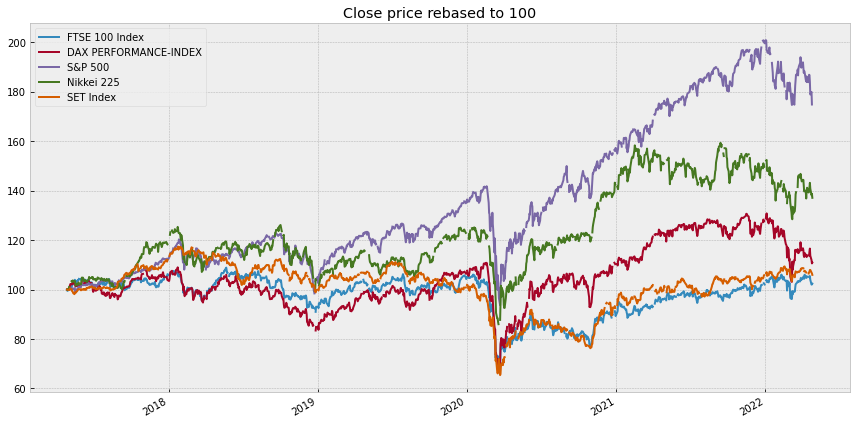

In [19]:
(data_close/data_close.iloc[0] * 100).plot(figsize=(12,6), xlabel='', 
                                           title='Close price rebased to 100')
plt.tight_layout()
plt.show()

# A Quick Example

In [5]:
mu = expected_returns.mean_historical_return(data_close, frequency=252, log_returns=True)
mu

FTSE 100 Index          -0.010058
DAX PERFORMANCE-INDEX   -0.000366
S&P 500                  0.092733
Nikkei 225               0.044862
SET Index               -0.001737
dtype: float64

In [6]:
S = risk_models.sample_cov(data_close, frequency=252, log_returns=True)
S 

,FTSE 100 Index,DAX PERFORMANCE-INDEX,S&P 500,Nikkei 225,SET Index
FTSE 100 Index,0.029105,0.028603,0.019016,0.011382,0.012341
DAX PERFORMANCE-INDEX,0.028603,0.040467,0.023376,0.013210,0.014583
S&P 500,0.019016,0.023376,0.038727,0.008943,0.009579
Nikkei 225,0.011382,0.013210,0.008943,0.034426,0.009809
SET Index,0.012341,0.014583,0.009579,0.009809,0.025366


In [7]:
ef = EfficientFrontier(mu, S, verbose=False)

In [8]:
weights = ef.max_sharpe()
weights

OrderedDict([('FTSE 100 Index', 0.0),
             ('DAX PERFORMANCE-INDEX', 0.0),
             ('S&P 500', 0.8795819491066167),
             ('Nikkei 225', 0.1204180508933834),
             ('SET Index', 0.0)])

In [9]:
weights_df = pd.DataFrame(data=weights.items())
weights_df.rename(columns={0:'indices', 1:'weights'}, inplace=True)
weights_df.set_index('indices', inplace=True)
weights_df.sort_values(by='weights', ascending=False, inplace=True)

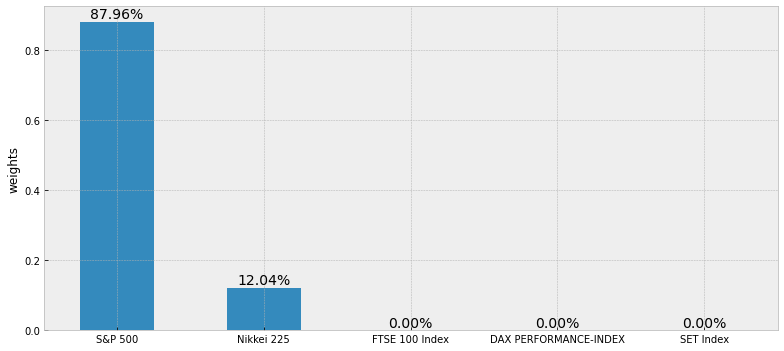

In [20]:
ax = weights_df.plot(kind='bar', legend=False, xlabel='', ylabel='weights', figsize=(11,5))

patches = ax.patches
weight = weights_df.values.flatten()
for p, w in zip(patches, weight):
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 0.01
    ax.annotate(f"{w*100:.2f}%", (x,y), ha='center', fontsize=14)

plt.xticks(rotation='0')
plt.tight_layout()
plt.show()

In [11]:
ef.portfolio_performance(verbose=True)

Expected annual return: 8.7%
Annual volatility: 18.0%
Sharpe Ratio: 0.37


(0.08696879694488815, 0.1798754326843747, 0.3723065231614898)